# Ideas for generating random signals

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

# Time series signal with some random normal noise

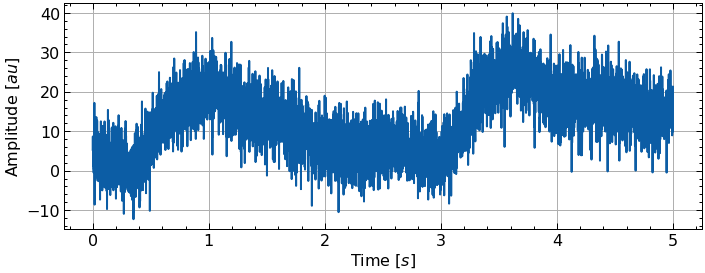

In [78]:
# create signal
srate = 1000  # Hz
time = np.arange(0, 5, 1 / srate)
n = len(time)
p = 15  # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * 30)
noise = noiseamp * np.random.randn(n)
signal = ampl + noise

# show the singal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, "-")
plt.grid()
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude [$au$]")
plt.tight_layout()
plt.show()


# Gaussian kernel using FWHM

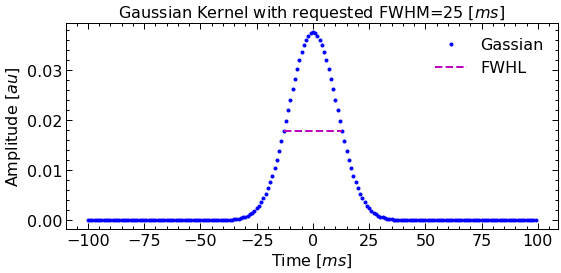

In [99]:
## create Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 25  # in ms

srate = 1000  # Hz
time = np.arange(0, 5, 1 / srate)

# normalized time vector in ms
k = 100
gtime = 1000 * np.arange(-k, k) / srate

# create Gaussian window
gauswin = np.exp(-(4 * np.log(2) * gtime**2) / fwhm**2)

# compute empirical FWHM
pstPeakHalf = k + np.argmin((gauswin[k:] - 0.5) ** 2)
prePeakHalf = np.argmin((gauswin - 0.5) ** 2)

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

# plot the signal
plt.figure(figsize=(8, 4))
plt.plot(gtime, gauswin, "b.", label="Gassian")
plt.plot(
    [gtime[prePeakHalf], gtime[pstPeakHalf]],
    [gauswin[prePeakHalf], gauswin[pstPeakHalf]],
    "m--",
    label="FWHL",
)
plt.xlabel("Time [$ms$]")
plt.ylabel("Amplitude [$au$]")
plt.title(f"Gaussian Kernel with requested FWHM={fwhm} [$ms$]")
plt.legend()
plt.tight_layout()
plt.show()


# A spike time series

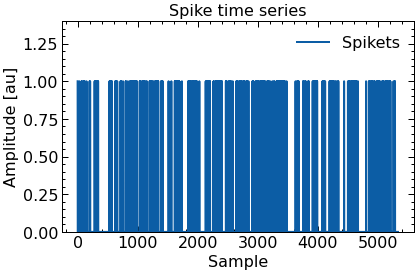

In [109]:
## generate time series of random spikes

# number of spikes
n = 300

# inter-spike intervals (exponential distribution for bursts)
isi = np.round(np.exp(np.random.randn(n)) * 10)

# generate spike time series
spikets = np.zeros(int(sum(isi)))

for i in range(0, n):
    spikets[int(np.sum(isi[0:i]))] = 1

plt.figure(figsize=(6, 4))
plt.plot(spikets, label='Spikets')
plt.ylim([0,1.4])
plt.xlabel('Sample')
plt.ylabel('Amplitude [au]')
plt.title('Spike time series')
plt.legend()
plt.tight_layout()
plt.show()


# A recorded EMG data 

In [114]:
import scipy.io as sio

# import data
emgdata = sio.loadmat('data/emg-sample-data.mat')

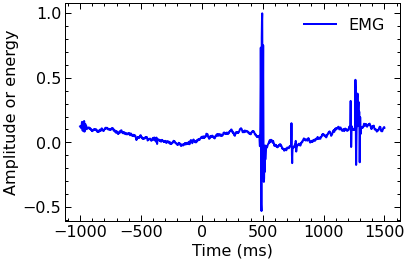

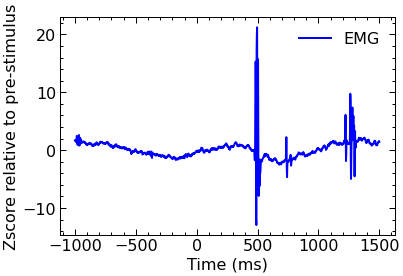

In [120]:
import scipy.io as sio
import copy

# import data
emgdata = sio.loadmat('data/emg-sample-data.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# find timepoint zero
time0 = np.argmin(emgtime**2)

# convert original EMG to z-score from time-zero
emgZ = (emg-np.mean(emg[0:time0])) / np.std(emg[0:time0])

## plot
# plot "raw" (normalized to max.1)
plt.figure(figsize=(6,4))
plt.plot(emgtime,emg/np.max(emg),'b',label='EMG')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude or energy')
plt.legend()
plt.show()

# plot zscored
plt.figure(figsize=(6,4))
plt.plot(emgtime,emgZ,'b',label='EMG')
plt.xlabel('Time (ms)')
plt.ylabel('Zscore relative to pre-stimulus')
plt.legend()
plt.show()

# A time series with spike noise 

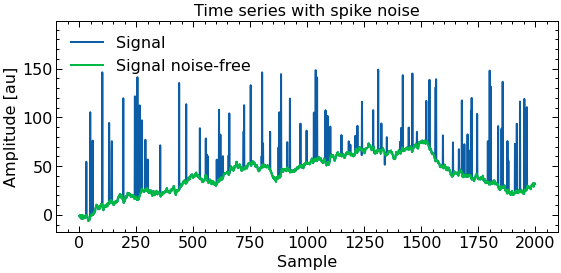

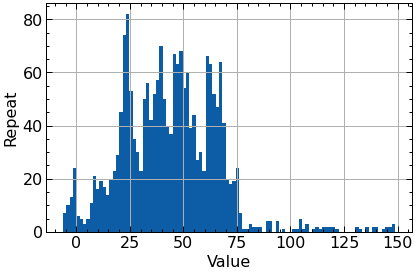

In [171]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n)) # + np.linspace(-30,30,n) # linear trend
signal_pure = copy.deepcopy(signal)

# proportion of time points to replace with noise
propnoise = 0.05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0 : int(n * propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50 + np.random.rand(len(noisepnts)) * 100

# plot signal and histogram
plt.figure(figsize=(8, 4))
plt.plot(signal, label="Signal")
plt.plot(signal_pure, label="Signal noise-free")
plt.ylim([signal.min()-np.std(signal)/2, signal.max()+np.std(signal)*2.2])
plt.xlabel("Sample")
plt.ylabel("Amplitude [au]")
plt.title("Time series with spike noise")
plt.legend()
plt.tight_layout()
plt.show()

# # use hist to pick threshold
plt.figure(figsize=(6, 4))
plt.hist(signal, 100)
plt.ylabel("Repeat")
plt.xlabel("Value")
plt.grid()
plt.tight_layout()
plt.show()


# Signal with slow polynomial artifact

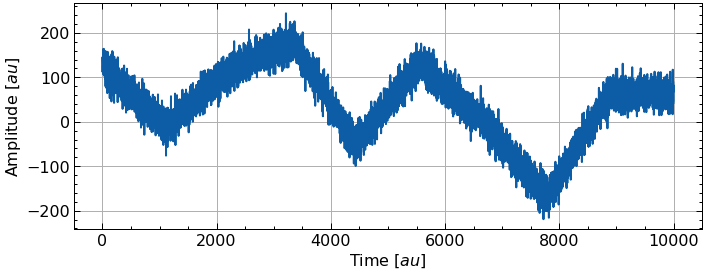

In [174]:
## generate signal with slow polynomial artifact

n = 10000
t = range(0,n)
k = 10 # number of poles for random amplitudes

slowdrift = np.interp(np.linspace(1,k,n),np.arange(0,k),100*np.random.randn(k))
signal = slowdrift + 20*np.random.randn(n)

# show the singal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, "-")
plt.grid()
plt.xlabel("Time [$au$]")
plt.ylabel("Amplitude [$au$]")
plt.tight_layout()
plt.show()

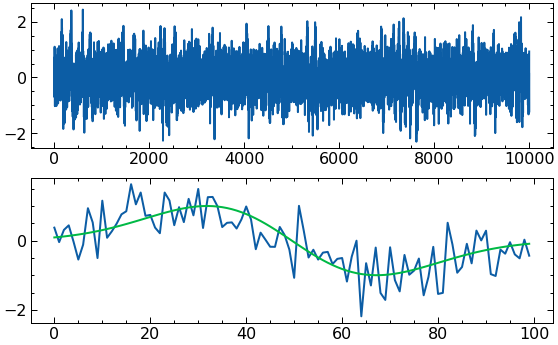

In [261]:
## simulate data

%matplotlib inline


# create event (derivative of Gaussian)
k = 100 # duration of event in time points
event = np.diff(np.exp( -np.linspace(-2,2,k+1)**2 ))
event = event/np.max(event) # normalize to max=1

# event onset times
Nevents = 30
onsettimes = np.random.permutation(10000-k)
onsettimes = onsettimes[0:Nevents]

# put event into data
data = np.zeros(10000)
for ei in range(0,Nevents):
    data[onsettimes[ei]:onsettimes[ei]+k] = event

# add noise
data = data + .5*np.random.randn(len(data))

# plot data
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(data)

# plot one event
plt.subplot(212)
plt.plot(range(0,k), data[onsettimes[3]:onsettimes[3]+k])
plt.plot(range(0,k), event)
plt.tight_layout()
plt.show()